In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
pro_2016 = pd.read_csv('/Users/ming/Downloads/all/properties_2016.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


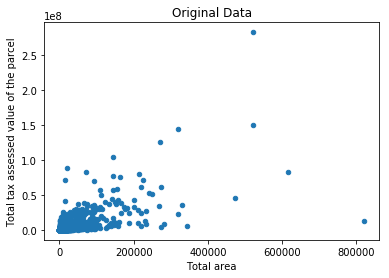

In [62]:
pro_2016.plot(kind='scatter', x='finishedsquarefeet15', y='taxvaluedollarcnt')
_ = plt.title('Original Data')
_ = plt.xlabel('Total area')
_ = plt.ylabel('Total tax assessed value of the parcel')

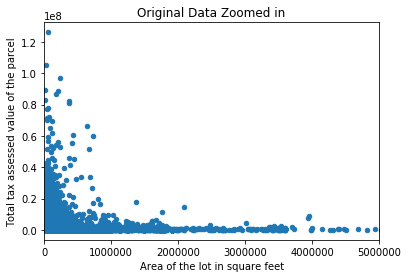

In [63]:
pro_2016.plot(kind='scatter', x='lotsizesquarefeet', y='taxvaluedollarcnt', xlim={0, 5000000})
_ = plt.title('Original Data Zoomed in')
_ = plt.xlabel('Area of the lot in square feet')
_ = plt.ylabel('Total tax assessed value of the parcel')

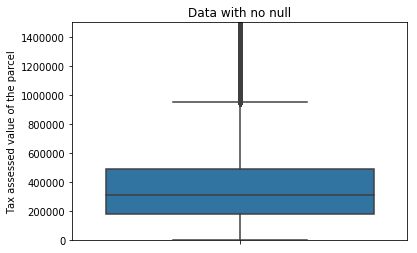

In [51]:
sub = pro_2016.dropna(subset=['taxvaluedollarcnt'])
                            
# Create box plot
_ = sns.boxplot(y='taxvaluedollarcnt', data=sub)
_.set_ylim([0, 0.15*10**7])
_ = plt.ylabel('Tax assessed value of the parcel')  
_ = plt.title('Data with no null')
plt.show()

In [52]:
# Specify array of percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(sub.taxvaluedollarcnt, percentiles)
print(ptiles_vers)

#Compute the interquartile range, IQR
IQR = ptiles_vers[3] - ptiles_vers[1]

#Compute the whisker position, which extend 1.5IQR, the points outside the whisker are demarcated as the outliners
print(1.5*IQR + ptiles_vers[3])

data_no_outliners = sub[sub.taxvaluedollarcnt <= 1.5*IQR + ptiles_vers[3]]

[  42894.  179675.  306086.  488000. 1489270.]
950487.5


In [17]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

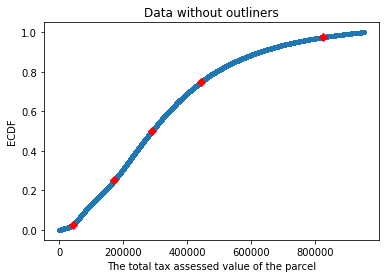

In [55]:
# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(data_no_outliners.taxvaluedollarcnt, percentiles)

x_tax, y_tax = ecdf(data_no_outliners.taxvaluedollarcnt)
_ = plt.plot(x_tax, y_tax, '.')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.xlabel('The total tax assessed value of the parcel')
_ = plt.ylabel('ECDF')
_ = plt.title('Data without outliners')

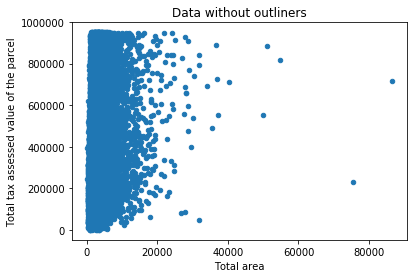

In [64]:
data_no_outliners.plot(kind='scatter', x='finishedsquarefeet15', y='taxvaluedollarcnt')
_ = plt.title('Data without outliners')
_ = plt.xlabel('Total area')
_ = plt.ylabel('Total tax assessed value of the parcel')

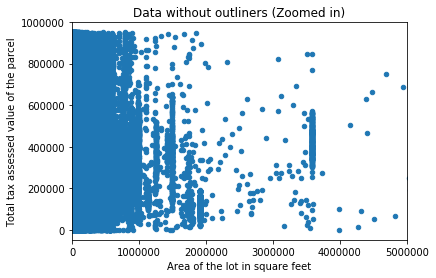

In [65]:
data_no_outliners.plot(kind='scatter', x='lotsizesquarefeet', y='taxvaluedollarcnt', xlim={0, 5000000})
_ = plt.title('Data without outliners (Zoomed in)')
_ = plt.xlabel('Area of the lot in square feet')
_ = plt.ylabel('Total tax assessed value of the parcel')

In [ ]:
# What do the long strips indicate???